<h1 style="color:blue"><center>Introduction To Data Science</center></h1>

<h3 style="color:black"><center> New York Citi Bike Trips </center></h3>
<br>
<p>Data Set : https://s3.amazonaws.com/tripdata/index.html </p>

Citi Bike is a bike sharing service available in New York City, that permits easy and affordable bike trips. They regularly release data about such trips, including starting and ending stations, starting and ending time, duration of the trip and few others variables. 

Let's take a look at our data!

  What is the question?
 * If Citi bike as a company were to expand in order to manage high traffic areas - what locations would they consider adding more docks or resources?
 
 * How can they improve services for their customers on weekday v/s weekend based on traffic and usage?
 
 * Regress to a predicted value of number of bikes needed in high demand areas? 
 
Why should anyone care?
* Primarily, helps **Citi Bike** as a company to get perspective as to how they can improve their services and generate more revenue.

* These insights can also help regular **Citi Bike users**.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import folium


In [2]:
#Importing data into a DataFrame
citi_data = pd.read_csv('./citi_bike_aug.csv') 
citi_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We have some null values in the data.

In [3]:
#Looking at the dimensions
citi_data.shape 

(1977177, 15)

**The data includes:**

* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Lat/Long
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender (Zero=unknown; 1=male; 2=female)
* Year of Birth

The data only includes trips that begin at publicly available stations (thereby excluding trips that originate at the depots for rebalancing or maintenance purposes).

### Data Cleaning and Preprocessing

In [4]:
#Setting column names for convenience and readibility
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [5]:
#Renaming the column names 
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1
1977176,738,2018-08-31 23:59:55.7330,2018-09-01 00:12:14.0300,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1


#### Investigating Null Values

In [6]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id            True
origin               True
origin_latitude     False
origin_longitude    False
dest_id              True
destination          True
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [7]:
citi_data[citi_data.origin_id.isnull()]

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [8]:
null_citi = pd.DataFrame(citi_data[citi_data['origin'].isnull()])
null_citi
citi_data.dropna(axis=0,inplace=True)
citi_data.shape


(1975789, 15)

In [9]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id           False
origin              False
origin_latitude     False
origin_longitude    False
dest_id             False
destination         False
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [10]:

print(np.unique(null_citi[['origin_latitude', 'origin_longitude']].values))
print(np.unique(null_citi[['dest_latitude', 'dest_longitude']].values))

[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]
[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]


The same bunch of locations at origin and destination - could be a result of failure of some system at the docking station for these locations? 

In [11]:
null_citi.groupby(['origin_longitude','origin_latitude','dest_latitude','dest_longitude']).size()

origin_longitude  origin_latitude  dest_latitude  dest_longitude
-73.920           40.848           40.848         -73.920           2
                                                  -73.917           1
                                                  -73.899           2
                                   40.860         -73.899           1
-73.917           40.848           40.848         -73.914           2
                                   40.851         -73.893           1
-73.914           40.845           40.845         -73.890           1
                                   40.848         -73.917           1
                                                  -73.914           1
                                   40.854         -73.905           1
                  40.848           40.845         -73.917           1
                                   40.848         -73.920           1
                                                  -73.914           3
-73.911           40.845 

So many combinations, must mean a bunch of paths are affected, wherein the origin anddestination was failed to be recorded. Let's leave this aside for now. 


Let's now take a look at the summary of the data.

In [12]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender
count,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06
mean,1.010755e+03,1.627431e+03,4.073731e+01,-7.398247e+01,1.622045e+03,4.073695e+01,-7.398262e+01,2.618566e+04,1.979599e+03,1.136640e+00
std,1.130585e+04,1.449333e+03,3.081010e-02,1.962236e-02,1.449197e+03,3.066852e-02,1.972379e-02,6.233147e+03,1.170649e+01,5.707102e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.740000e+02,3.820000e+02,4.071745e+01,-7.399596e+01,3.820000e+02,4.071740e+01,-7.399601e+01,1.995100e+04,1.969000e+03,1.000000e+00
50%,6.400000e+02,5.140000e+02,4.073782e+01,-7.398565e+01,5.130000e+02,4.073726e+01,-7.398602e+01,2.774500e+04,1.982000e+03,1.000000e+00
75%,1.129000e+03,3.258000e+03,4.075898e+01,-7.397179e+01,3.258000e+03,4.075763e+01,-7.397188e+01,3.150200e+04,1.989000e+03,1.000000e+00
max,3.095079e+06,3.705000e+03,4.081439e+01,-7.390774e+01,3.705000e+03,4.081439e+01,-7.390774e+01,3.483900e+04,2.002000e+03,2.000000e+00


In [13]:
#Formatting the starttime and stoptime
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [14]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,00:11:28.992000
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,00:10:45.029000
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,00:22:20.637000
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,00:04:06.819000
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,00:07:09.281000


In [15]:
#Splitting the starttime and stoptime in terms of hour, weekday, day, minute, week
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.weekday_name
citi_data['Start_Day'] = citi_data['starttime'].dt.day
citi_data['Start_Minute'] = citi_data['starttime'].dt.minute
citi_data['Start_Week'] = citi_data['starttime'].dt.week
citi_data['Start_weekday'] = citi_data['starttime'].dt.weekday

citi_data['Stop_hour'] = citi_data['stoptime'].dt.hour
citi_data['Stop_Dayofweek'] = citi_data['stoptime'].dt.weekday_name
citi_data['Stop_Day'] = citi_data['stoptime'].dt.day
citi_data['Stop_Minute'] = citi_data['stoptime'].dt.minute
citi_data['Stop_Week'] = citi_data['stoptime'].dt.week
citi_data['Stop_weekday'] = citi_data['stoptime'].dt.weekday

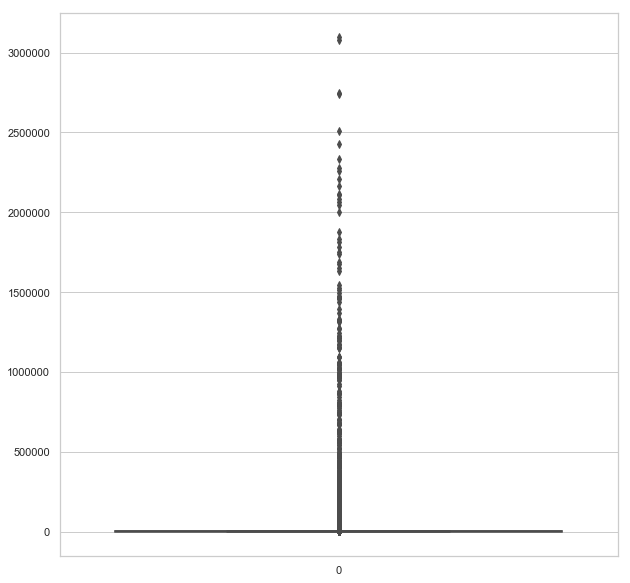

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
sns.boxplot(data=citi_data['tripduration'])
fig=plt.gcf()
fig.set_size_inches(10,10)


Notice, how we have some very high values for trip duration and some very low values for trip duration. 

--->High values maybe seen, when someone did not dock their bike. Low values, because someone undocked the bike - did not use it and docked it back.

---> As part of cleaning, we want to get rid of the extremely high values and extremely low values? 

### Data Visualization and Analysis

Monday       244896
Tuesday      269680
Wednesday    346381
Thursday     353943
Friday       326414
Saturday     209613
Sunday       224862
Name: Start_Dayofweek, dtype: int64


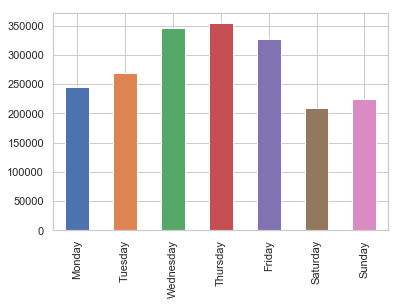

In [17]:
#counting the number of week days:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_of_rides_weekly=citi_data.Start_Dayofweek.value_counts().reindex(DAYS, fill_value=0)
count_of_rides_weekly.plot(kind='bar')
print(count_of_rides_weekly)

It appears from the above graph, that, The peak usage of Citi bike is Wednesday, Thursday and Friday. Let us also take a look at subscriber/customer usage pattern over the week (counts by day).

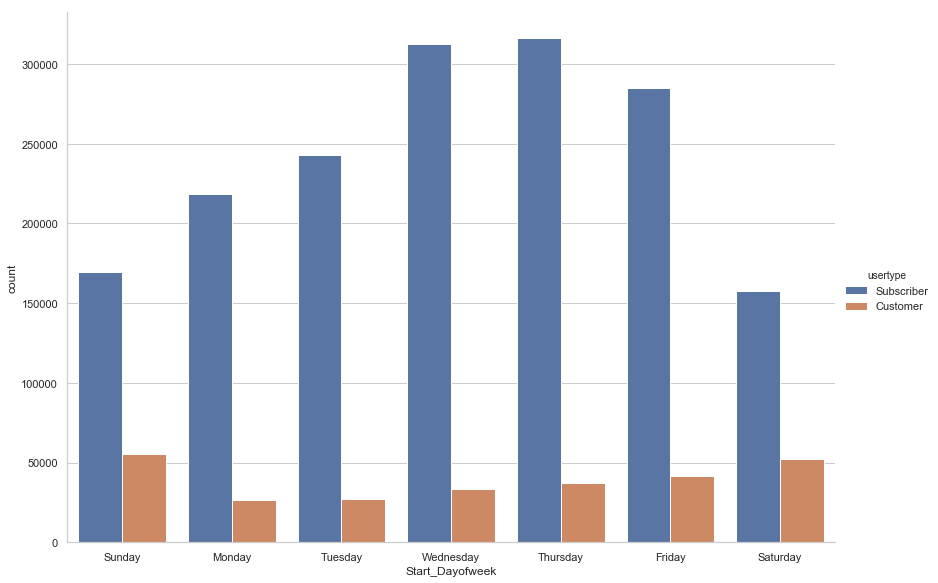

In [18]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
g = sns.catplot("Start_Dayofweek", 
                 hue="usertype",
                 data=citi_data, kind="count",order = order, height=8.27, aspect=11.7/8.27);


As we can see from the above plots, the patterns of usage are different - Customer usage during the weekdays are clearly much lower than their usage in the weekend. 

We do imagine New York has visitors over the weekend and we can henceforth see that pattern here as well. 

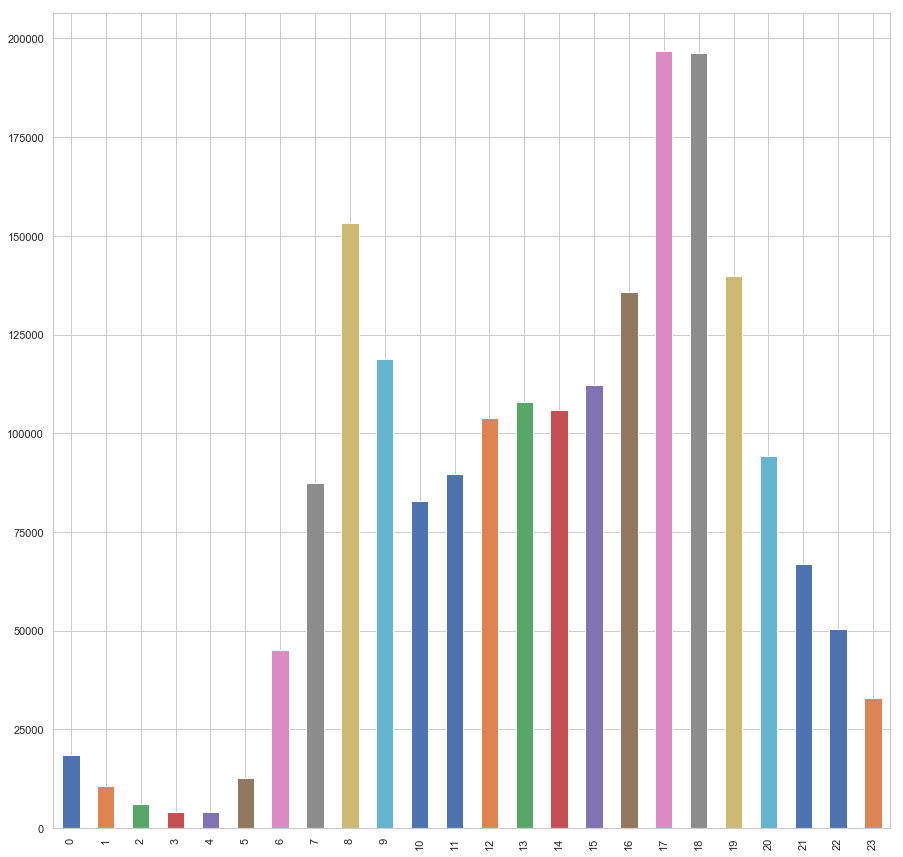

In [19]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
plt.figure(figsize = (15,15))
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

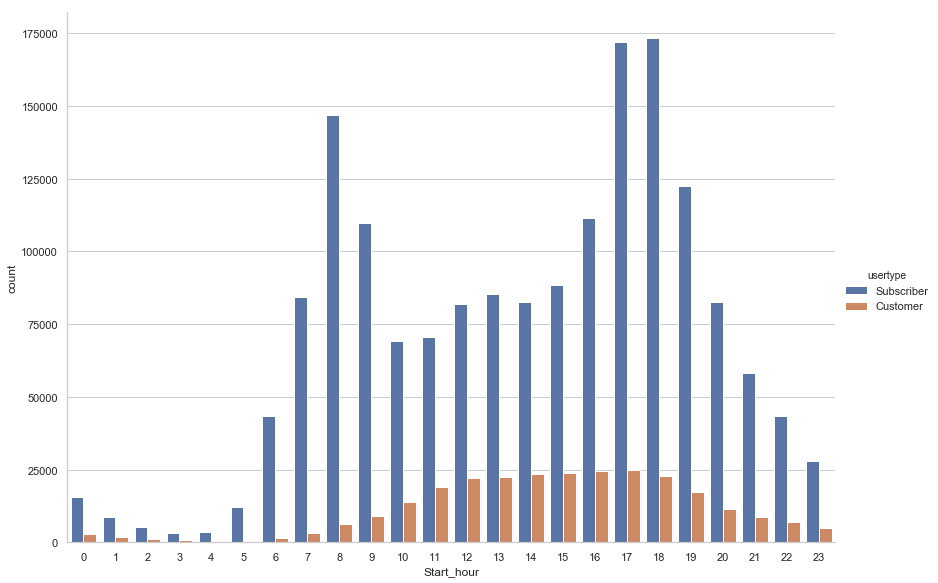

In [20]:
#Counting riders hourly
hour = range(0,24)

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data, kind="count",order = hour, height=8.27, aspect=11.7/8.27);



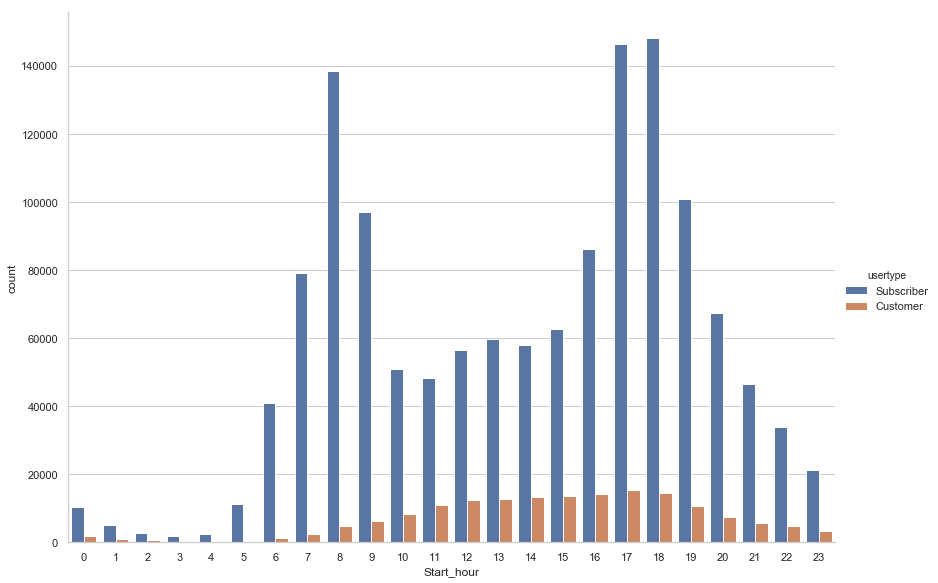

In [21]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday"]



g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekday)], kind="count",order = hour, height=8.27, aspect=11.7/8.27);


We can see a pattern of usage for subscribers on weekdays - peaking at about and around 8 am and 5-6 pm. Whereas there seems to be a similar pattern of usage by "Customer" usertype - high usage starting 10-11 am until 6-7 pm on the weekdays.

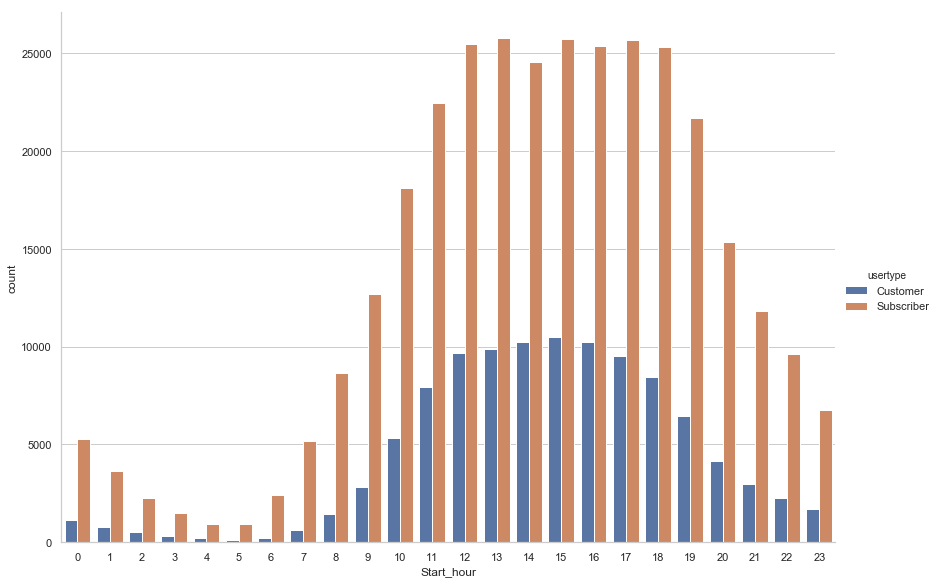

In [22]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekend = ["Saturday","Sunday"]

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekend)], 
                kind="count",order = hour, height=8.27, aspect=11.7/8.27);




The patterns for Weekends are clear from the above plot - For both categories, subscriber and customer, there seems to be high demand between 10 am and 7 pm. Some Subscribers also seem to be touring around New York on weekends. 

Let's try to see the most frequent origin destination pairs.

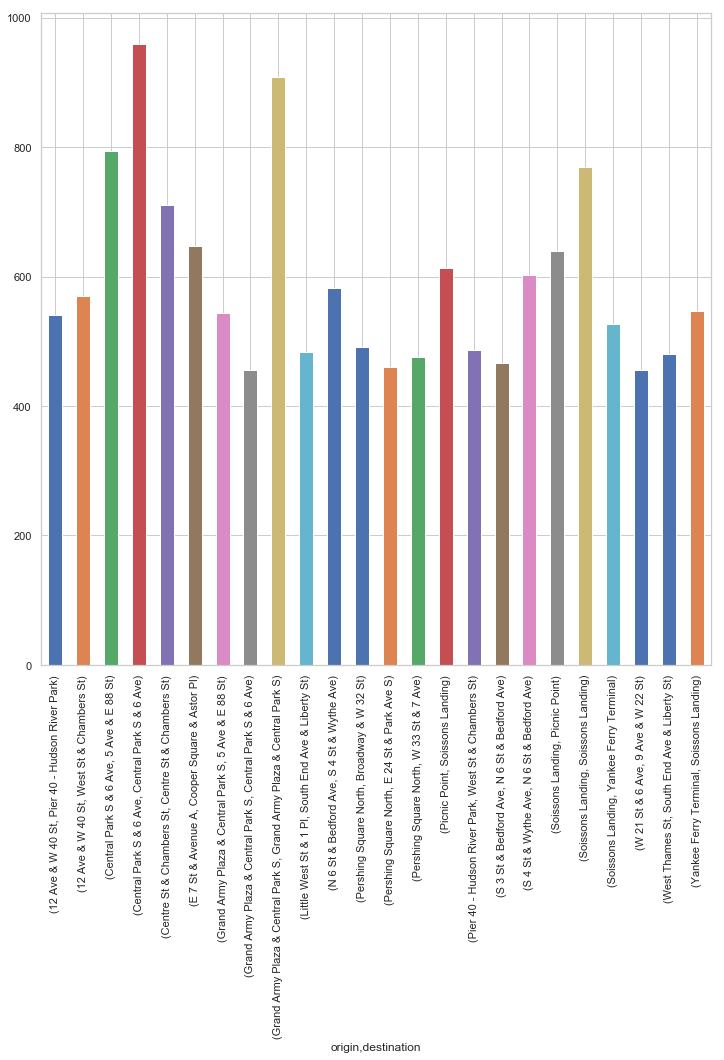

In [23]:
high_origin_dest = citi_data.groupby(['origin','destination']).size()

top_origin_dest = high_origin_dest[high_origin_dest>450]


plt.figure(figsize=(12,12))
top_origin_dest.plot(kind='bar')

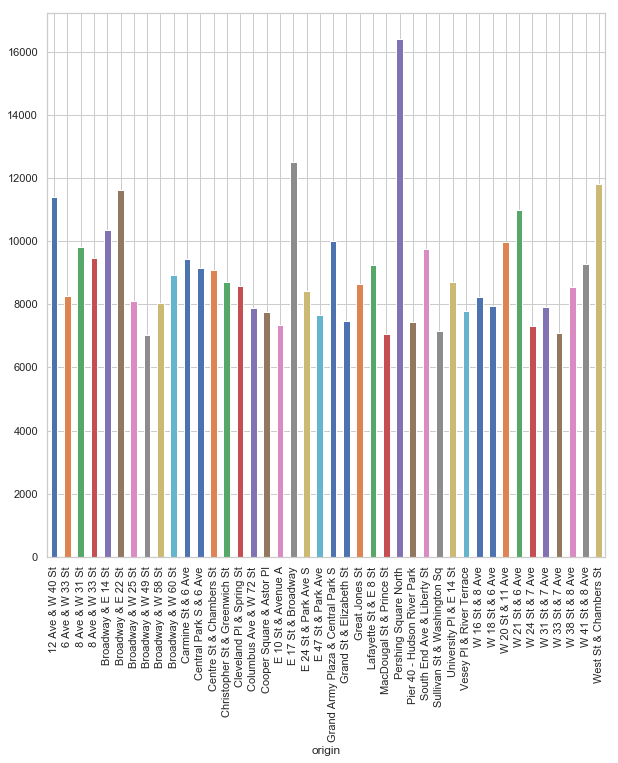

In [24]:
high_origin = citi_data.groupby(['origin']).size()

top_origin = high_origin[high_origin>7000]

plt.figure(figsize=(10,10))
top_origin.plot(kind='bar' )


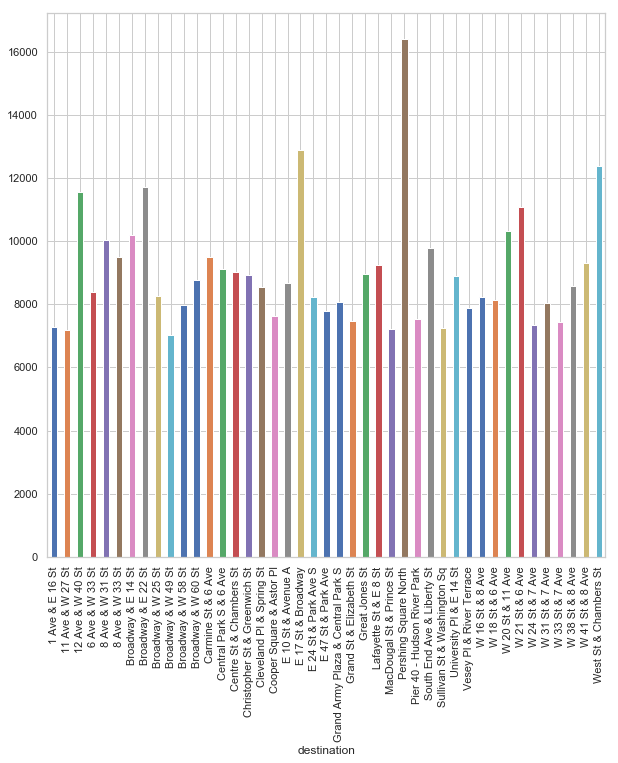

In [25]:
high_dest = citi_data.groupby(['destination']).size()

top_dest = high_dest[high_dest>7000]

plt.figure(figsize=(10,10))
top_dest.plot(kind='bar' )

In [26]:
types_users = citi_data['usertype'].value_counts()

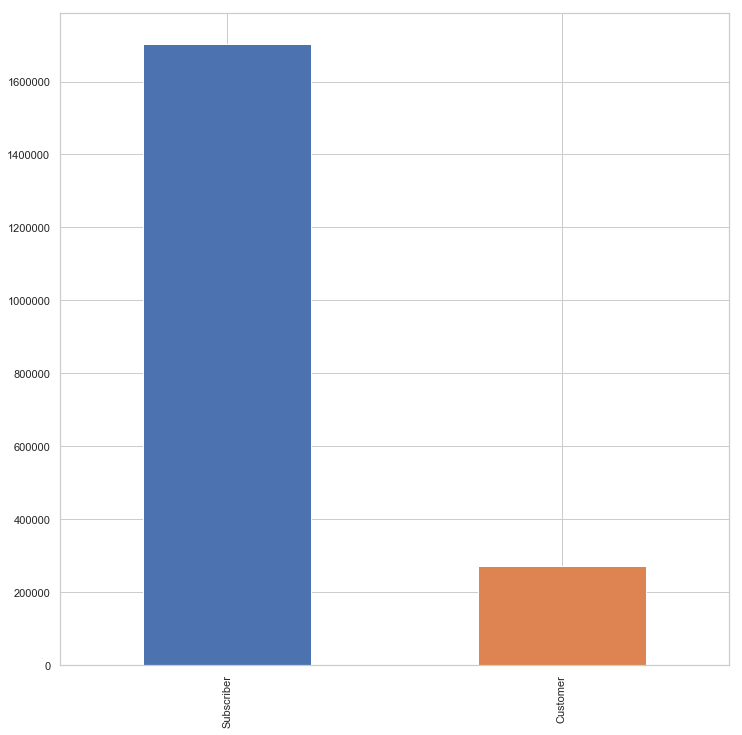

In [27]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

In [28]:
gender_users = citi_data['gender'].value_counts()
gender_users


1    1295366
2     475197
0     205226
Name: gender, dtype: int64

10% of the gender values are unknown - 0 value Let's drop these values as our further analysis requires gender values for speed analysis. 

In [29]:
citi_data.shape

(1975789, 31)

In [30]:
#Dropping unknown gender values
citi_data.drop(citi_data[citi_data.gender == 0].index,inplace=True) 
citi_data.shape

(1770563, 31)

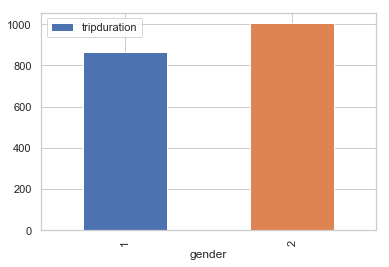

In [31]:
#Finding the average tripduration by gender
mean_trip_gender = citi_data.groupby('gender', as_index=False)['tripduration'].mean() 
mean_trip_gender.plot(x='gender',y='tripduration',kind='bar')

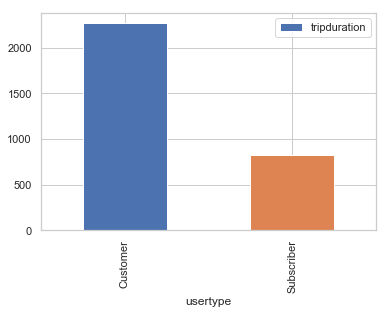

In [32]:
mean_trip_usertype = citi_data.groupby('usertype', as_index = False)['tripduration'].mean()
mean_trip_usertype.plot(x='usertype',y='tripduration',kind='bar')

### Further Analysis to answer questions

Calculating age to see if there are any outliers. 

In [33]:
citi_data['age'] = 2018 - citi_data['birth_year'].astype(int)
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,0,31,2,0,Wednesday,1,11,31,2,32
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,0,31,2,0,Wednesday,1,10,31,2,49
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,0,31,2,0,Wednesday,1,22,31,2,48
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,0,31,2,0,Wednesday,1,4,31,2,36
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,0,31,2,0,Wednesday,1,7,31,2,31


In [34]:
#Setting a threshold for age of bike riders and looking at the count
old_people = citi_data.age[citi_data.age>70] 
old_people.count()

11009

In [35]:
#Dropping high age values
citi_data.drop(citi_data[citi_data.age >70].index,inplace=True) 
citi_data.shape

(1759554, 32)

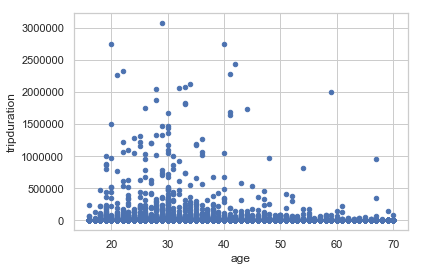

In [36]:
#Is there a relationship between age and tripduration?
citi_data.plot.scatter('age','tripduration') 

Distance will be a major contributing factor for tripdurations among other explanatory variables and we are going to calculate it as shown below:

In [37]:
from geopy.distance import vincenty
from geopy.distance import great_circle
import math
from haversine import haversine


def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371/1.609 # miles
#Earth radius is the approximate distance from Earth's center to its surface, about 6,371 km (3,959 mi).
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
       * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d


#Calculating distance between origin and destination

dist = []
for i in range(len(citi_data)):
    dist.append(haversine((citi_data['origin_latitude'][i], citi_data['origin_longitude'][i]), (citi_data['dest_latitude'][i], citi_data['dest_longitude'][i])))


citi_data['Distance'] = dist


In [38]:
citi_data.shape

(1759554, 33)

In [39]:
origin_dest_same = citi_data[(citi_data['origin'] == citi_data['destination'])]
origin_dest_same.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
100,981,2018-08-01 00:09:16.350,2018-08-01 00:25:37.395,513.0,W 56 St & 10 Ave,40.768254,-73.988639,513.0,W 56 St & 10 Ave,40.768254,...,31,2,0,Wednesday,1,25,31,2,61,0.0
116,1161,2018-08-01 00:11:15.029,2018-08-01 00:30:36.353,3175.0,W 70 St & Amsterdam Ave,40.777480,-73.982886,3175.0,W 70 St & Amsterdam Ave,40.777480,...,31,2,0,Wednesday,1,30,31,2,38,0.0
279,949,2018-08-01 00:27:25.353,2018-08-01 00:43:15.214,3351.0,E 102 St & 1 Ave,40.786995,-73.941648,3351.0,E 102 St & 1 Ave,40.786995,...,31,2,0,Wednesday,1,43,31,2,26,0.0
388,2280,2018-08-01 00:38:53.036,2018-08-01 01:16:53.323,146.0,Hudson St & Reade St,40.716250,-74.009106,146.0,Hudson St & Reade St,40.716250,...,31,2,1,Wednesday,1,16,31,2,54,0.0
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,Wednesday,1,42,31,2,50,0.0


In [40]:
#Looking at data that has a calculated distance = 0 
circular = citi_data[(citi_data['Distance']==0.0) & (citi_data['tripduration']<120)]
print(circular.shape)
circular.head()

(3630, 33)


,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,Wednesday,1,42,31,2,50,0.0
717,113,2018-08-01 01:42:19.442,2018-08-01 01:44:13.242,483.0,E 12 St & 3 Ave,40.732233,-73.988900,483.0,E 12 St & 3 Ave,40.732233,...,31,2,1,Wednesday,1,44,31,2,21,0.0
1946,96,2018-08-01 06:23:18.721,2018-08-01 06:24:55.191,480.0,W 53 St & 10 Ave,40.766697,-73.990617,480.0,W 53 St & 10 Ave,40.766697,...,31,2,6,Wednesday,1,24,31,2,26,0.0
2095,92,2018-08-01 06:30:12.208,2018-08-01 06:31:45.171,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3494.0,E 115 St & Lexington Ave,40.797911,...,31,2,6,Wednesday,1,31,31,2,33,0.0
2206,96,2018-08-01 06:35:04.400,2018-08-01 06:36:40.965,127.0,Barrow St & Hudson St,40.731724,-74.006744,127.0,Barrow St & Hudson St,40.731724,...,31,2,6,Wednesday,1,36,31,2,28,0.0


We do not see any "Circular trips". There are no instances of same origin and destination in the data.

In [41]:
#Dropping the circular trips 
citi_data = citi_data.drop(citi_data.index[(citi_data['Distance'] == 0.0) & (citi_data['tripduration']<120)])
citi_data.shape

(1755924, 33)

In [42]:
#statistical summary of tripduration
citi_data['tripduration'].describe() 

count    1.755924e+06
mean     9.047428e+02
std      9.866440e+03
min      6.100000e+01
25%      3.600000e+02
50%      6.010000e+02
75%      1.035000e+03
max      3.076381e+06
Name: tripduration, dtype: float64

In [43]:
#statistical summary of distance
citi_data['Distance'].describe() 

count    1.755924e+06
mean     1.831653e+00
std      1.478032e+00
min      0.000000e+00
25%      8.314410e-01
50%      1.389319e+00
75%      2.362702e+00
max      1.819242e+01
Name: Distance, dtype: float64

In [44]:
citi_data[(citi_data['tripduration']>=3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)].shape 

(40929, 33)

In [45]:
citi_data.drop(citi_data.index[(citi_data['tripduration']>= 3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)],inplace=True)
citi_data.shape

(1714995, 33)

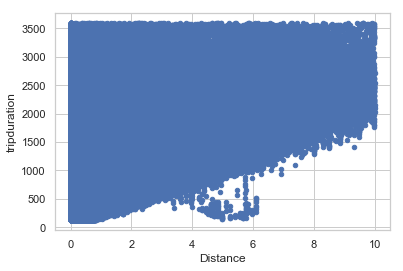

In [46]:
#Checking if there is any relation between distance and trip duration
citi_data.plot.scatter('Distance','tripduration') 

There is definitely a pattern between distance and tripduration, but we do not see a very strong relationship.

In [47]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,31,2,0,Wednesday,1,11,31,2,32,2.594850
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,31,2,0,Wednesday,1,10,31,2,49,2.164037
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,31,2,0,Wednesday,1,22,31,2,48,1.058240
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,31,2,0,Wednesday,1,4,31,2,36,0.595883
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,31,2,0,Wednesday,1,7,31,2,31,1.096288


We will now be computing speed of bike based on the computed distance and time information that we have. We are trying t determine if factors such as gender and age affect the speed of the rider and therefore the tripduration. 

In [48]:
#Add Minutes column for Trip Duration
citi_data['Minutes'] = citi_data['tripduration']/60
#For Visual purposes, rounded
citi_data['Minutes'] = round(citi_data['Minutes'])
citi_data['Minutes'] = citi_data['Minutes'].astype(int)

In [49]:
citi_data['min_mile'] = round((citi_data['Minutes']/citi_data['Distance']), 2)
citi_data['mile_hour'] = round(citi_data['Distance']/(citi_data['Minutes']/60),2)

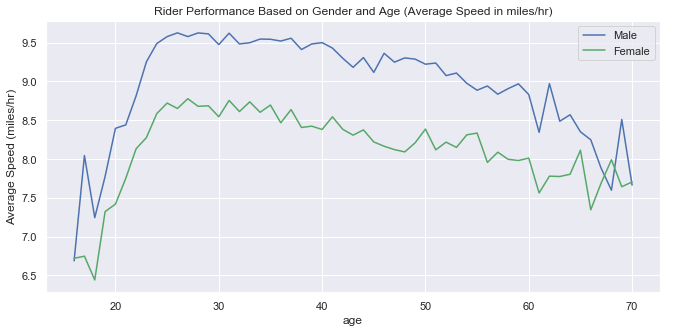

In [111]:
#Rider performance by age and Gender in Miles/hr
#del([fig,ax6])
fig1, ax6 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['mile_hour'].unstack().plot(ax=ax6,color ="bg")
ax6.legend(['Male', 'Female'])
plt.ylabel('Average Speed (miles/hr)')
plt.title('Rider Performance Based on Gender and Age (Average Speed in miles/hr)')
plt.show()

## Linear Regression to estimate future trip duration that will help Citi Bike plan their resources better.

In [52]:
citi_data.columns.values

array(['tripduration', 'starttime', 'stoptime', 'origin_id', 'origin',
       'origin_latitude', 'origin_longitude', 'dest_id', 'destination',
       'dest_latitude', 'dest_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'start_date', 'start_time', 'stop_date',
       'stop_time', 'Start_hour', 'Start_Dayofweek', 'Start_Day',
       'Start_Minute', 'Start_Week', 'Start_weekday', 'Stop_hour',
       'Stop_Dayofweek', 'Stop_Day', 'Stop_Minute', 'Stop_Week',
       'Stop_weekday', 'age', 'Distance', 'Minutes', 'min_mile',
       'mile_hour'], dtype=object)

In [53]:
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
citi_data['Weekday']=citi_data['Start_Dayofweek'].apply(lambda x: 1 if x in Weekday else 0)
morning = range(0,11);afternoon = [12,13,14,15,16,17];evening = range(18,23)
print("morning:",morning,"afternoon:",afternoon,"evening:",evening)


morning: range(0, 11) afternoon: [12, 13, 14, 15, 16, 17] evening: range(18, 23)


(1714995, 37)

In [54]:
citi_data.shape

(1714995, 37)

In [55]:
df = citi_data.iloc[:,[32,12,14,0,36]]
df.head()

,Distance,usertype,gender,tripduration,Weekday
0,2.594850,Subscriber,1,681,1
1,2.164037,Subscriber,1,625,1
2,1.058240,Subscriber,1,1319,1
3,0.595883,Subscriber,1,220,1
4,1.096288,Subscriber,1,398,1


### Model Building

We are applying Linear Regression to predict future trip duration values as this would be a helpful tip for Citibike to plan their logistics. 

Another advantage of regressing or being able to predict future tripdurations helps users plan their time better as well.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
import sys

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
#Using Stat Models for Linear Regression
lm1 = smf.ols(formula='tripduration ~ Distance+C(usertype)+C(gender)+C(Weekday)', data=df).fit()

# print the coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                 5.442e+05
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:40:49   Log-Likelihood:            -1.2604e+07
No. Observations:             1714995   AIC:                         2.521e+07
Df Residuals:                 1714990   BIC:                         2.521e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   680.7355      1.389    490.192      0.000     678.014     683.457
C(usertype)[T.Subscriber]  -402.5426      1.267   -317.766      0.000    -405.025    -400.060
C(gender)[T.2]               73.6348      0.649    113.428      0.000      72.362      74.907
C(Weekday)[T.1]             -73.9264      0.722   -102.396      0.000     -75.341     -72.511
Distance                    282.1196      0.200   1411.746      0.000     281.728     282.511
==============================================================================
Omnibus:                  1132859.075   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15756712.977
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      16.539   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the above regression, we are trying to explain the variability por predict values of tripduration (in seconds) using explanatory variables such as usertype, gender, weekday v/s weekend. 

R-quared obtained is 0.553. These variables are not explaining the variability of tripduration that well and the model may be tuned to perform better. 

The p-values are significant and we can definitely see some behavior from the above regression. 
1. customer (at level 0 of dummy) definitely adds more positively to the tripduration indicating from this data, customers take longer trips(keeping all other variables constant)
2. males add positivel to the regression of tripduration indicating that they are slower than females in this sample. 
3. weekday is contributing negatively to the tripduration, which is an interesting find - people are in a hurry during weekdays v/s more leisure riding over the weekend. 
4. Distance as we can imagine, adds a high positive value to tripduration and indicative that larger distance values will infact take a longer time of tripduration. 


We are also using Scikit learn to test the performance of this model on test data and is as follows:

Let's create dummy variables for Linear regression using Scikit Learn

In [58]:
#Creating dummy variables
for column in df.columns:
     if df[column].dtype==object:
        dummyCols=pd.get_dummies(df[column])
        df=df.join(dummyCols)
        del df[column]


In [59]:
#Creating a LinearRegression object
model = LinearRegression()
#Removing target for testing if predictions are accurate
Y = df.pop('tripduration')
#Creating a sparse matrix with current observations
X = df.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [60]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1371996, 5) (1371996,)
(342999, 5) (342999,)


In [61]:
#Fitting the model using linear regression
dur = model.fit(x_train, y_train)
#Predicting for unseen test examples
dur_pred = model.predict(x_test)

In [62]:
#print the coefficients
print(dur.intercept_)
print(dur.coef_)


404.9677851483352
[ 282.02752898   73.97004421  -73.65164329  200.92260745 -200.92260745]


In [63]:
#Making coefficients readable
coefficients=pd.DataFrame({'name':list(df),'value':dur.coef_})
coefficients

,name,value
0,Distance,282.027529
1,gender,73.970044
2,Weekday,-73.651643
3,Customer,200.922607
4,Subscriber,-200.922607


In [64]:
#Looking at the R-squared value for the regression
print("R²:",dur.score(x_test,y_test))

R²: 0.5597984753090951


It appears that the R-squared is almost the same as what we got with stat models. 55% accuracy indicates that the model can be improved. 

In [68]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour,Weekday
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,1,11,31,2,32,2.594850,11,4.24,14.15,1
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,1,10,31,2,49,2.164037,10,4.62,12.98,1
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,1,22,31,2,48,1.058240,22,20.79,2.89,1
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,1,4,31,2,36,0.595883,4,6.71,8.94,1
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,1,7,31,2,31,1.096288,7,6.39,9.40,1


### Load Balancing

In [69]:
subscriber_data = citi_data[citi_data['usertype'] == 'Subscriber']
origin_undocked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'origin_id', 'origin']).size().reset_index(name='outflow')
docked_outflow = origin_undocked.sort_values(['outflow'], ascending=False).head(10)
docked_outflow

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow
239970,17,28,Tuesday,519.0,Pershing Square North,166
239305,17,27,Monday,519.0,Pershing Square North,164
236676,17,23,Thursday,519.0,Pershing Square North,159
236009,17,22,Wednesday,519.0,Pershing Square North,158
255515,18,21,Tuesday,402.0,Broadway & E 22 St,151
227179,17,8,Wednesday,519.0,Pershing Square North,150
240603,17,29,Wednesday,519.0,Pershing Square North,147
225867,17,6,Monday,519.0,Pershing Square North,144
235214,17,21,Tuesday,359.0,E 47 St & Park Ave,142
234676,17,20,Monday,519.0,Pershing Square North,142


In [70]:
dest_docked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'dest_id', 'destination']).size().reset_index(name='inflow')
docked_inflow = dest_docked.sort_values(['inflow'], ascending=False).head(10)
docked_inflow

,Start_hour,Start_Day,Start_Dayofweek,dest_id,destination,inflow
235318,17,28,Tuesday,519.0,Pershing Square North,152
234627,17,27,Monday,519.0,Pershing Square North,139
229857,17,20,Monday,519.0,Pershing Square North,137
222053,17,8,Wednesday,519.0,Pershing Square North,136
220691,17,6,Monday,519.0,Pershing Square North,135
218051,17,2,Thursday,519.0,Pershing Square North,130
231247,17,22,Wednesday,519.0,Pershing Square North,128
236004,17,29,Wednesday,519.0,Pershing Square North,126
68249,8,21,Tuesday,359.0,E 47 St & Park Ave,125
227268,17,16,Thursday,519.0,Pershing Square North,119


In [71]:
station_load = pd.merge(origin_undocked, dest_docked, left_on = ['origin_id','Start_hour','Start_Day','Start_Dayofweek'], 
                        right_on = ['dest_id','Start_hour','Start_Day','Start_Dayofweek'])
station_load.shape

(276446, 9)

In [72]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1
2,0,1,Wednesday,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1


In [73]:
station_load['load'] = station_load['inflow'] - station_load['outflow']

In [74]:
station_load.head(20)

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0
2,0,1,Wednesday,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2,0
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0
5,0,1,Wednesday,173.0,Broadway & W 49 St,1,173.0,Broadway & W 49 St,1,0
6,0,1,Wednesday,223.0,W 13 St & 7 Ave,3,223.0,W 13 St & 7 Ave,2,-1
7,0,1,Wednesday,228.0,E 48 St & 3 Ave,2,228.0,E 48 St & 3 Ave,1,-1
8,0,1,Wednesday,229.0,Great Jones St,2,229.0,Great Jones St,1,-1
9,0,1,Wednesday,236.0,St Marks Pl & 2 Ave,5,236.0,St Marks Pl & 2 Ave,3,-2


**NOTE: load is negative for the hour where no inflow happened but there was an outflow. This is a sign of bikes being undocked. **

i. If the load is a high negative value -> More outflow happened than inflow indicating higher demand for bikes.

ii. If the load is a high positive value -> More inflow than outflow and may indicate a demand for available docks.

In [75]:
station_load.sort_values(['load'],ascending=False) #Shortage of docks available 

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
45297,8,23,Thursday,520.0,W 52 St & 5 Ave,2,520.0,W 52 St & 5 Ave,97,95
176268,17,7,Tuesday,3255.0,8 Ave & W 31 St,22,3255.0,8 Ave & W 31 St,115,93
171566,16,30,Thursday,3255.0,8 Ave & W 31 St,10,3255.0,8 Ave & W 31 St,102,92
45181,8,23,Thursday,359.0,E 47 St & Park Ave,27,359.0,E 47 St & Park Ave,117,90
180795,17,15,Wednesday,3255.0,8 Ave & W 31 St,24,3255.0,8 Ave & W 31 St,114,90
40517,8,14,Tuesday,359.0,E 47 St & Park Ave,28,359.0,E 47 St & Park Ave,115,87
44011,8,21,Tuesday,359.0,E 47 St & Park Ave,38,359.0,E 47 St & Park Ave,125,87
59277,9,21,Tuesday,402.0,Broadway & E 22 St,15,402.0,Broadway & E 22 St,101,86
44589,8,22,Wednesday,359.0,E 47 St & Park Ave,29,359.0,E 47 St & Park Ave,112,83
44705,8,22,Wednesday,520.0,W 52 St & 5 Ave,4,520.0,W 52 St & 5 Ave,84,80


In [76]:
station_load.sort_values(['load'],ascending=True) #Outflow high

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
183463,17,20,Monday,359.0,E 47 St & Park Ave,141,359.0,E 47 St & Park Ave,18,-123
20714,6,29,Wednesday,3255.0,8 Ave & W 31 St,138,3255.0,8 Ave & W 31 St,15,-123
177241,17,9,Thursday,359.0,E 47 St & Park Ave,135,359.0,E 47 St & Park Ave,13,-122
184094,17,21,Tuesday,359.0,E 47 St & Park Ave,142,359.0,E 47 St & Park Ave,20,-122
185483,17,23,Thursday,520.0,W 52 St & 5 Ave,128,520.0,W 52 St & 5 Ave,10,-118
176629,17,8,Wednesday,359.0,E 47 St & Park Ave,136,359.0,E 47 St & Park Ave,21,-115
203030,18,21,Tuesday,402.0,Broadway & E 22 St,151,402.0,Broadway & E 22 St,39,-112
20345,6,28,Tuesday,3255.0,8 Ave & W 31 St,123,3255.0,8 Ave & W 31 St,12,-111
173061,17,2,Thursday,359.0,E 47 St & Park Ave,130,359.0,E 47 St & Park Ave,19,-111
187791,17,27,Monday,359.0,E 47 St & Park Ave,137,359.0,E 47 St & Park Ave,28,-109


NOTE: 
We do not have the **number of docks** information but it may seem obvious to observe that any docking station will not have 100+ docks. So, there is a valet service in place for such locations. 

In [77]:
station_8_W31 = station_load.loc[station_load['origin_id'] == 3255]
station_8_W31 = station_8_W31.loc[~station_load['Start_Dayofweek'].isin(('Saturday','Sunday'))]
station_8_W31.shape

(470, 10)

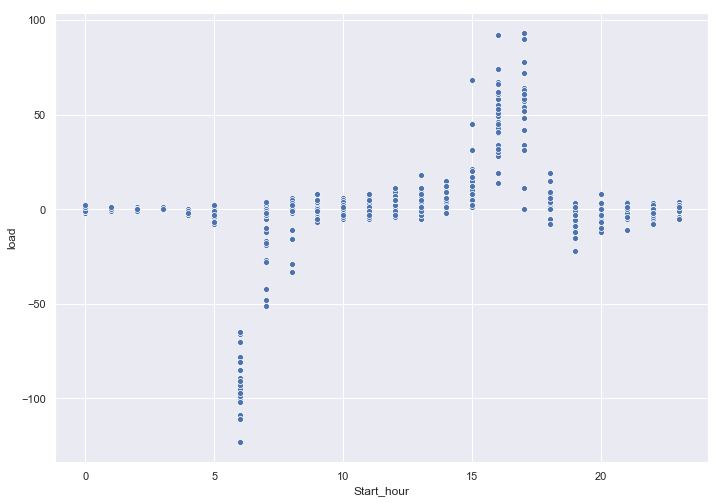

In [78]:
#station_load = sns.load_dataset("station_load")
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})

l = sns.scatterplot(x = 'Start_hour',y = 'load',data=station_8_W31)

**NOTE:** The usage pattern suggests that the inflow and outflow patterns have an inverse relationship when observing morning peak hour and evening peak hour.

This also explains that commuters have common origin and destination points - such as Penn Station to work in the morning and back in the evening.

Let's see the visualization map for the peak hours

In [79]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

folium.CircleMarker(location=[40.738, -73.98],fill=True).add_to(folium_map)
#folium_map

In [80]:
citi_data["starttime"] = pd.to_datetime(citi_data["starttime"])
citi_data["stoptime"] = pd.to_datetime(citi_data["stoptime"])
citi_data["hour"] = citi_data["starttime"].map(lambda x: x.hour)

We'll write a function that does the following:

- generate a DataFrame containing locations of stations
- generates a DataFrame containing the number of trips originating at each station.
- generates a DataFrame containing the number of trips arriving at each station.

join the three dataframes into one.

In [81]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour,Weekday,hour
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,11,31,2,32,2.594850,11,4.24,14.15,1,0
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,10,31,2,49,2.164037,10,4.62,12.98,1,0
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,22,31,2,48,1.058240,22,20.79,2.89,1,0
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,4,31,2,36,0.595883,4,6.71,8.94,1,0
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,7,31,2,31,1.096288,7,6.39,9.40,1,0


In [82]:
def get_trip_counts_by_hour(selected_hour):
    # make a DataFrame with locations for each bike station
    locations = citi_data.groupby("origin_id").first()
    locations = locations.loc[:, ["origin_latitude",
                                 "origin_longitude",
                                 "origin"]]
    
    #select one time of day
    subset = citi_data[citi_data["hour"]==selected_hour]
    
    # count trips for each destination
    departure_counts =  subset.groupby("origin_id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departure Count"]
    
    # count trips for each origin
    arrival_counts =  subset.groupby("dest_id").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]

    #join departure counts, arrival counts, and locations
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

# print a sample to check our code works
get_trip_counts_by_hour(5).head(5)

,Departure Count,origin_latitude,origin_longitude,origin,Arrival Count
origin_id,,,,,
72.0,50,40.767272,-73.993929,W 52 St & 11 Ave,9.0
79.0,7,40.719116,-74.006667,Franklin St & W Broadway,15.0
82.0,3,40.711174,-74.000165,St James Pl & Pearl St,7.0
83.0,1,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,26.0
119.0,13,40.696089,-73.978034,Park Ave & St Edwards St,1.0


Now we'll write a function that generates a new folium map and adds circle markers for each station.

In [83]:
def plot_station_counts(trip_counts):
    # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

    # for each row in the data, add a cicle marker
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = (row["Departure Count"]-row["Arrival Count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total arrival: {}<br> total departure: {}<br> net departure: {}"
        popup_text = popup_text.format(row["origin"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)
        
        # radius of circles
        radius = net_departures/20
        
        # choose the color of the marker
        if net_departures>0:
            
            color="#E37222" # tangerine
        else:
                     
             color="#0A8A9F" # teal
        
        # add marker to the map
        folium.CircleMarker(location=(row["origin_latitude"],
                                      row["origin_longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

**Showing Real data**

As we know that the outflow is peak in morning hours between 6-8 am. So, let's make 2 maps to show the different patterns for bike migration at 6 am and 8 am.

In [84]:
# plot net departures at 6 AM

trip_counts = get_trip_counts_by_hour(6)
plot_station_counts(trip_counts)

From the above graph we can see that **8 Ave & W 32 ST** have highest no of net departures(2132) at 6-7 AM. We should make sure that there is enough citi bike available for commuters during this time period.

In [85]:
# plot net departures at  5 PM

trip_counts = get_trip_counts_by_hour(17)
plot_station_counts(trip_counts)

From the above graph we can see that **E 47 St & Park Ave** have highest no of net departures(1933) at 5-6 PM. We should make sure that there is enough citi bike available for commuters during this time period.

We can shift few bikes from **8 Ave & W31 St** as this dock has less departures and highest no of arrival(1861)

Now lets see the the availability of Citi bike around NewYork area (Station id)

In [86]:
t1 = citi_data[['origin_id', 'origin', 'origin_latitude', 'origin_longitude']] \
            .drop_duplicates().rename(columns = {'origin_id':'station id', \
                                                 'start station name':'station name', \
                                                 'origin_latitude':'station latitude', 
                                                 'origin_longitude': 'station longitude'})
t2 = citi_data[['dest_id', 'destination', 'dest_latitude', 'dest_longitude']] \
        .drop_duplicates().rename(columns = {'dest_id':'station id', \
                                             'destination':'station name', \
                                             'dest_latitude':'station latitude', \
                                             'dest_longitude': 'station longitude'})
df_loc = pd.concat([t1, t2],sort=False).drop_duplicates()

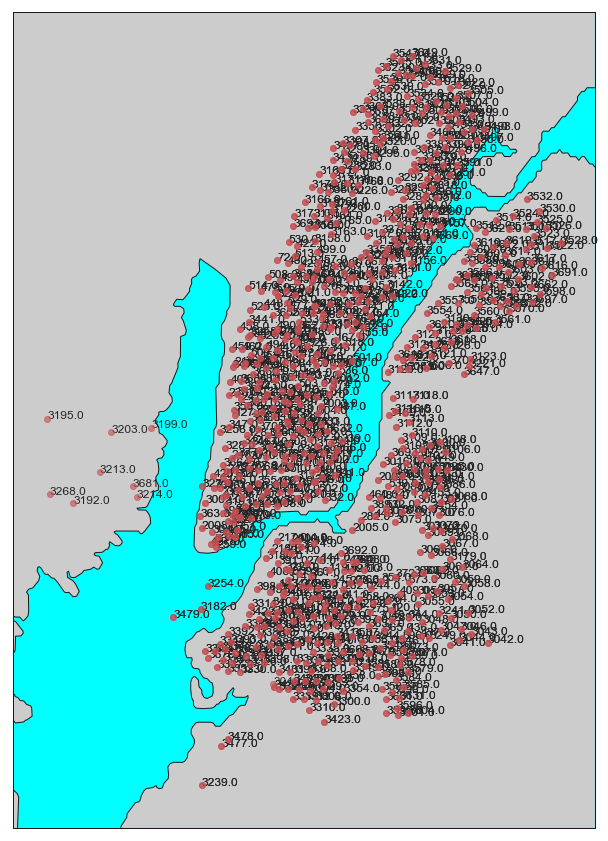

In [87]:
# Initialize plots
fig, ax = plt.subplots(figsize=(15,15))

# determine range to print based on min, max lat and lon of the data
lat = list(df_loc['station latitude'])
lon = list(df_loc['station longitude'])
text = list(df_loc['station id'])
margin = 0.01 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='lcc',
            resolution = 'f',)

m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawrivers()

# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)

# plot points as red dots
ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6)
for i in range(df_loc.shape[0]):
    plt.text(lons[i], lats[i], text[i])
plt.show()

In [88]:
station_load['load'].describe()

count    276446.000000
mean          0.022323
std           5.292010
min        -123.000000
25%          -2.000000
50%           0.000000
75%           2.000000
max          95.000000
Name: load, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1a3d6c71d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a3d6c3fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a3d6c2ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a3d6c5dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a3d6c7208>,
  <matplotlib.lines.Line2D at 0x1a3d6ca1d0>]}

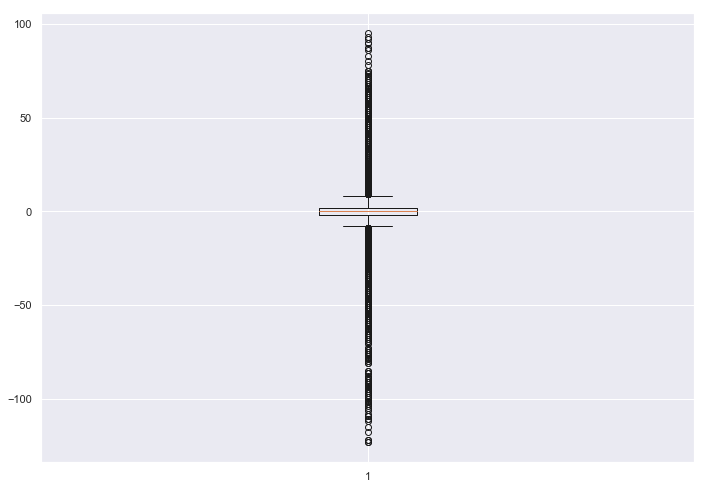

In [89]:
plt.boxplot(station_load['load'])

**Assuming Average number of docks in a station is close to 20. Keeping a buffer of +/- 10 bikes. **

We are interested in looking at cases where the outflow is much greater than inflow (highly -ve load). We have set a threshold of -30 and setting label to **Resource available**

We are also interested parallelly in observations with much larger inflow as compared to outflow (highly +ve load). We have set a threshold of +30 and setting label to **Resource not available**

In between - Class **Balanced**


In [90]:
def label_load(row):

    if row['inflow'] <= 2 and row['outflow'] <= 2:
        return 'idle'
    elif row['load'] <= -30:
        return 'high outflow'
#     elif -30 < row['load'] < -10:
#         return 'low outflow'
    elif -30 <= row['load'] < 0:
        return 'low outlow'
    elif 0 < row['load'] <= 30:
        return 'low inflow'
#     elif 10 < row['load'] <= 30 :
#         return 'low inflow'
    elif row['load'] > 30:
        return 'high inflow'
    else:
        return 'load balanced'

In [91]:
station_load['label'] = station_load.apply(lambda row: label_load(row),axis = 1)
labels = station_load.groupby('label')['load'].size()
labels

label
high inflow        416
high outflow       515
idle             69578
load balanced    18666
low inflow       94663
low outlow       92608
Name: load, dtype: int64

In [92]:
station_load = station_load[~station_load.label.isin(['high inflow', 'high outflow', 'load balanced'])]
station_load = station_load[~station_load.Start_Dayofweek.isin(['Saturday', 'Sunday'])] #Interested in weekday commuters

In [93]:
labels = station_load.groupby('label')['load'].size()
labels

label
idle          51166
low inflow    73523
low outlow    71237
Name: load, dtype: int64

In [94]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load,label
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1,idle
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0,idle
2,0,1,Wednesday,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2,0,idle
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2,low outlow
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0,idle


label
idle          51166
low inflow    73523
low outlow    71237
Name: load, dtype: int64

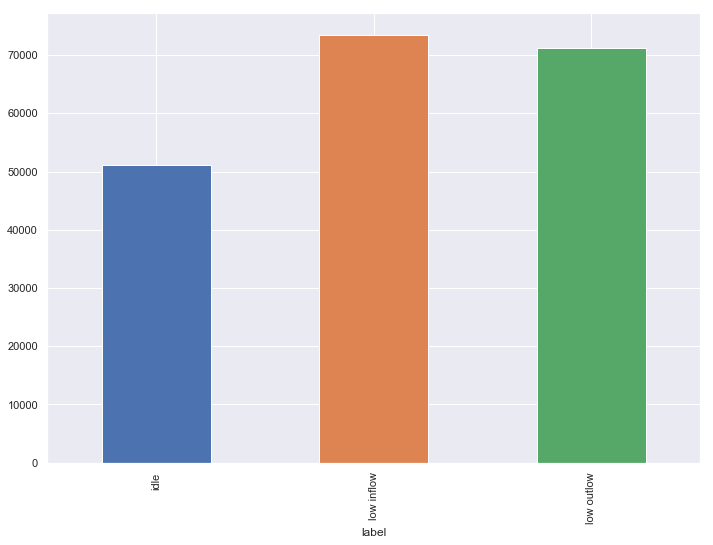

In [95]:
labels.plot(kind='bar')
labels

In [96]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load,label
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1,idle
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0,idle
2,0,1,Wednesday,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2,0,idle
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2,low outlow
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0,idle


In [97]:
station_load_cpy = pd.DataFrame(station_load)

## Selecting the features that are useful for model building

In [98]:
station_load.drop(station_load.columns[[1,4,5,6,7,8,9]],axis=1,inplace=True)

station_load.head()

,Start_hour,Start_Dayofweek,origin_id,label
0,0,Wednesday,72.0,idle
1,0,Wednesday,120.0,idle
2,0,Wednesday,146.0,idle
3,0,Wednesday,157.0,low outlow
4,0,Wednesday,168.0,idle


## Using Classification techniques to predict need for resources based on load.

In [99]:
from sklearn.preprocessing import LabelEncoder#Creating dummy variables
station_load = pd.get_dummies(station_load, columns=['Start_hour', 'Start_Dayofweek', 'origin_id'])
station_load

,label,Start_hour_0,Start_hour_1,Start_hour_2,Start_hour_3,Start_hour_4,Start_hour_5,Start_hour_6,Start_hour_7,Start_hour_8,...,origin_id_3690.0,origin_id_3691.0,origin_id_3692.0,origin_id_3693.0,origin_id_3695.0,origin_id_3697.0,origin_id_3699.0,origin_id_3700.0,origin_id_3701.0,origin_id_3705.0
0,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = station_load

# y is a vector, hence we use dot to access 'label'
y = station_load.label


In [101]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
Y = station_load.pop('label')
#Creating a sparse matrix with current observations
X = station_load.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [102]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(multi_class='ovr',solver = 'newton-cg')

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [104]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5225590772214567


In [105]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

low inflow    14631
low outlow    14397
idle          10158
Name: label, dtype: int64

In [106]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
metrics.confusion_matrix(y_test, y_pred_class)

array([[7348, 1466, 1344],
       [2298, 7091, 5242],
       [2223, 6136, 6038]])

### Decision Tree

In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
for base_clf in (MultinomialNB(), RandomForestClassifier(),DecisionTreeClassifier()):

        clf = OneVsRestClassifier(base_clf).fit(X, y)
        assert_equal(set(clf.classes_), classes)
        y_pred = clf.predict(np.array([[0, 0, 4]]))[0]
        assert_equal(set(y_pred), set("eggs"))

        # test input as label indicator matrix
        clf = OneVsRestClassifier(base_clf).fit(X, Y)
        y_pred = clf.predict([[0, 0, 4]])[0]
        assert_array_equal(y_pred, [0, 0, 1])

NameError: name 'assert_equal' is not defined

In [117]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [118]:
# make class predictions for the testing set
y_pred_class = clf.predict(X_test)

In [119]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5836012861736335


### Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 300, 300, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators= 20, criterion = 'entropy',
                               min_samples_leaf= 2, min_samples_split= 2)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     train_results.append(roc_auc)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot(max_depths, train_results, color ='blue', label= 'Train AUC')
line1, = plt.plot(max_depths, test_results, color = 'red', label= 'Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
print("Random Forest:",accuracy_score(y_test, y_pred))

ValueError: multiclass format is not supported

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 20, criterion = 'entropy', max_depth= 300, min_samples_leaf= 2,
                                    min_samples_split= 2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random Forest:",accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score , accuracy_score, roc_curve, auc
accuracy , precision, recall  = accuracy_score(y_test,y_pred), precision_score(y_test,y_pred, average='weighted'),recall_score(y_test,y_pred, average='weighted')
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier:{:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))

In [ ]:
def build_grid_search(X, y):
    parameters = {
        "estimator__criterion": ['gini', 'entropy'],
        "estimator__max_depth": [10, 15, 20, 25, None],
        "estimator__max_features": ['auto', 'sqrt', 'log2', None]
    }
    ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=1000,
                                    oob_score=True, n_jobs=-1, verbose=1))
    model_tunning = GridSearchCV(ovr, param_grid=parameters, verbose=1,
                                 n_jobs=-1, cv=10,
                                 scoring=make_scorer(f1_score))
    model_tunning.fit(X, y)
    test_score = model_tunning.best_score_
    print ('The best test score: ', test_score)
    y_score = model_tunning.predict_proba(X_test)
    multiclass_roc(y_score, 'grid_search_02')
    return model_tunning 

In [ ]:
clf = LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train,y_train)

coefs=np.transpose(clf.coef_)

In [ ]:
coef_l1_LR = clf.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity achieved: %.2f%%" % sparsity_l1_LR)



### 